<h1>DESCRIPTION</h1>
<p>Over 370000 used cars scraped with Scrapy from Ebay-Kleinanzeigen.</p>

<h2>SUMMARY</h2>
<p>The content of the data is in german, so one has to translate it first if one can not speak german. Those fields are included:</p><br/>
<ul>
    <li>dateCrawled : when this ad was first crawled, all field-values are taken from this date</li>
    <li>name : "name" of the car</li>
    <li>seller : private or dealer</li>
    <li>offerType : types of offer</li>
    <li>price : the price on the ad to sell the car</li>
    <li>abtest : type of testing</li>
    <li>vehicleType : types of vehicle</li>
    <li>yearOfRegistration : at which year the car was first registered</li>
    <li>gearbox : types of gear available</li>
    <li>powerPS : power of the car in PS</li>
    <li>model : car's model</li>
    <li>kilometer : how many kilometers the car has driven</li>
    <li>monthOfRegistration : at which month the car was first registered</li>
    <li>fuelType : types of fuel </li>
    <li>brand : available car's brand</li>
    <li>notRepairedDamage : if the car has a damage which is not repaired yet</li>
    <li>dateCreated : the date for which the ad at ebay was created</li>
    <li>nrOfPictures : number of pictures in the ad</li>
    <li>postalCode : car sold in area</li>
    <li>lastSeenOnline : when the crawler saw this ad last online</li>
</ul>

<p>The fields lastSeen and dateCrawled could be used to estimate how long a car will be at least online before it is sold.</p>

<h4>Source: Kaggle</h4><a>https://www.kaggle.com/orgesleka/used-cars-database</a>

In [1]:
 # Importing Necessary Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from datetime import datetime
from ipywidgets import interact, widgets
import pgeocode

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
 # Importing Data from autos.csv file
df_auto = pd.read_csv('autos.csv', encoding='latin-1')

In [3]:
# Investigating the Dimension of Extracted Observations
df_auto.shape

(371528, 20)

In [4]:
# Checking null values in Columns
df_auto.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [5]:
# Defining a function to fill the null values with their max value counts of individual's column
def impute_missing_values(parameter):
    df_auto[parameter] = df_auto[parameter].fillna(df_auto[parameter].value_counts().index[0])

In [6]:
# Missing value imputation usin "impute_missing_values" function
impute_missing_values('vehicleType')
impute_missing_values('gearbox')
impute_missing_values('model')
impute_missing_values('fuelType')
impute_missing_values('notRepairedDamage')

In [7]:
# Checking all the columns of dataset
df_auto.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [8]:
# Dropping duplicate observation from dataset
df_auto = df_auto.drop_duplicates()

In [9]:
# Checking shape of datset
df_auto.shape

(371524, 20)

In [10]:
# Converting German word "ja" to 'yes' & "nein" to 'no' in English for better understanding
df_auto['notRepairedDamage'] = df_auto['notRepairedDamage'].map({'ja':'yes', 'nein':'no'})

In [11]:
# Investigating number of cars available for sale
print('Number of cars available in dataset : ', df_auto.name.nunique())

Number of cars available in dataset :  233531


In [12]:
# Dropping the feature : name as it is unnecessary while building model
df_auto = df_auto.drop(['name'], axis=1)

In [13]:
# Investigating overall structure of feature : monthOfRegistration
df_auto.monthOfRegistration.describe()

count    371524.000000
mean          5.734451
std           3.712423
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: monthOfRegistration, dtype: float64

In [14]:
# As there are 12 months in Calendar, 13 months can't be right. Removing observations of month = 12, contains ~ 12k observation
df_auto = df_auto[df_auto.monthOfRegistration != 12]

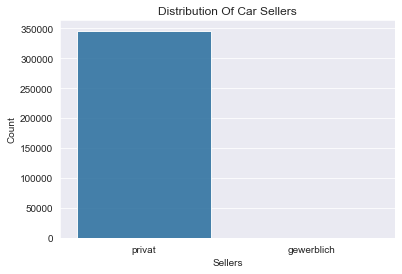

In [15]:
# Univariate Analysis of : Sellers
sns.barplot(df_auto.seller.value_counts().index, df_auto.seller.value_counts().values, alpha=0.9)
plt.xlabel('Sellers')
plt.ylabel('Count')
plt.title('Distribution Of Car Sellers');

In [16]:
# As almost all of the Sellers are from privat we can drop this feature
df_auto = df_auto.drop(['seller'], axis=1)

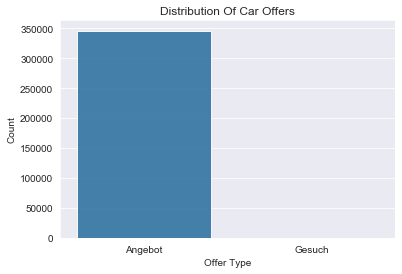

In [17]:
# Univariate Analysis of : Offer Type
sns.barplot(df_auto.offerType.value_counts().index, df_auto.offerType.value_counts().values, alpha=0.9)
plt.xlabel('Offer Type')
plt.ylabel('Count')
plt.title('Distribution Of Car Offers');

In [18]:
# As almost all of the Offers are from Angebot we can drop this feature
df_auto = df_auto.drop(['offerType'], axis=1)

In [19]:
print('Number of observation where price is 0 : ', df_auto[df_auto.price == 0]['price'].count())

Number of observation where price is 0 :  10258


In [20]:
# Number of observation where price is > 200000
df_auto[df_auto.price > 200000]['price'].count()

163

In [21]:
# Number of observation where price is < 200
df_auto[df_auto.price < 200]['price'].count()

16671

In [22]:
# Considering outlier, selecting observations in between $200 & $200000
df_auto = df_auto[(df_auto.price > 200) & (df_auto.price < 200000)]

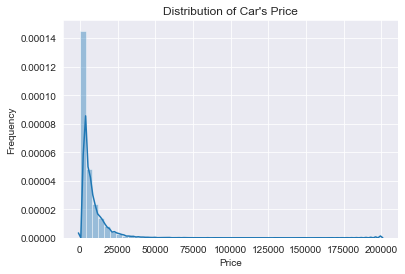

In [23]:
# Distribution of Price
sns.distplot(df_auto.price)
plt.xlabel("Price")
plt.ylabel('Frequency')
plt.title("Distribution of Car's Price");

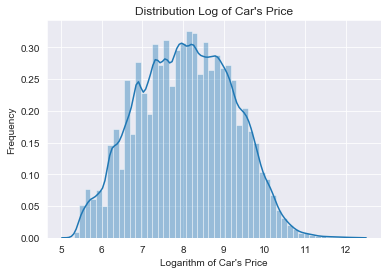

In [24]:
# Logarithm of Price Distribution
sns.distplot(np.log(df_auto.price))
plt.xlabel("Logarithm of Car's Price")
plt.ylabel('Frequency')
plt.title("Distribution Log of Car's Price");

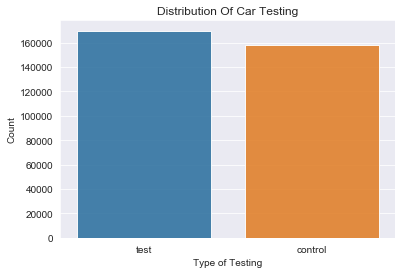

In [25]:
# Univariate Analysis of : AB Testing
sns.barplot(df_auto.abtest.value_counts().index, df_auto.abtest.value_counts().values, alpha=0.9)
plt.xlabel('Type of Testing')
plt.ylabel('Count')
plt.title('Distribution Of Car Testing');

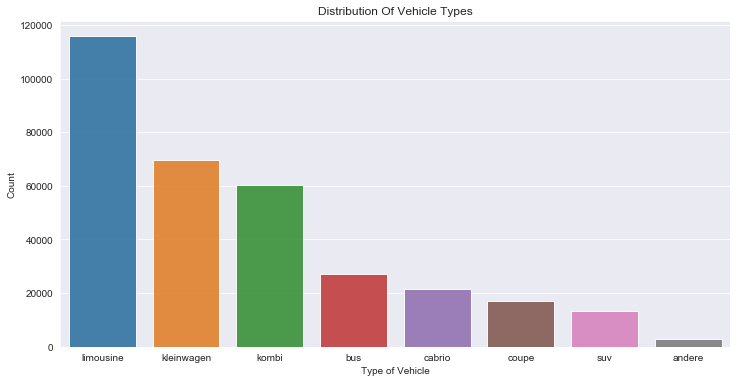

In [26]:
# Univariate Analysis of : Vehicle Type
plt.figure(figsize=(12,6))
sns.barplot(df_auto.vehicleType.value_counts().index, df_auto.vehicleType.value_counts().values, alpha=0.9)
plt.xlabel('Type of Vehicle')
plt.ylabel('Count')
plt.title('Distribution Of Vehicle Types');

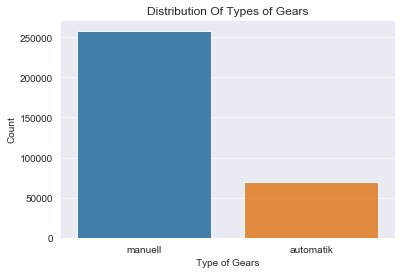

In [27]:
# Univariate Analysis of : Gear Type
sns.barplot(df_auto.gearbox.value_counts().index, df_auto.gearbox.value_counts().values, alpha=0.9)
plt.xlabel('Type of Gears')
plt.ylabel('Count')
plt.title('Distribution Of Types of Gears');

In [28]:
print('No of PowerPS is having value of 0 : ', df_auto[df_auto.powerPS == 0]['powerPS'].count())

No of PowerPS is having value of 0 :  31835


In [29]:
print('No of PowerPS is having value of more than 662 is : ', df_auto[df_auto.powerPS > 662]['powerPS'].count())

No of PowerPS is having value of more than 662 is :  313


In [30]:
# Removng cars having HP of 662 as the latest technology doesn't have HP > 662
# Removing observations having HP of 0 - as its meaningless
df_auto = df_auto[(df_auto.powerPS > 0) & (df_auto.powerPS < 663)]

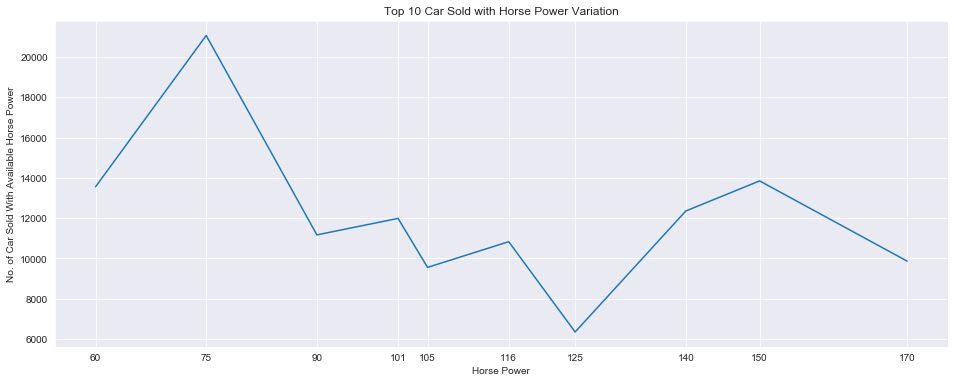

In [31]:
# Distribution of Top 10 Horse Powered car sold
plt.figure(figsize=(16,6))
sns.lineplot(df_auto[df_auto.powerPS > 0].powerPS.value_counts()[:10].index, 
             df_auto[df_auto.powerPS > 0].powerPS.value_counts()[:10].values)
plt.xticks(df_auto[df_auto.powerPS > 0].powerPS.value_counts()[:10].index)
plt.xlabel('Horse Power')
plt.ylabel('No. of Car Sold With Available Horse Power')
plt.title('Top 10 Car Sold with Horse Power Variation');

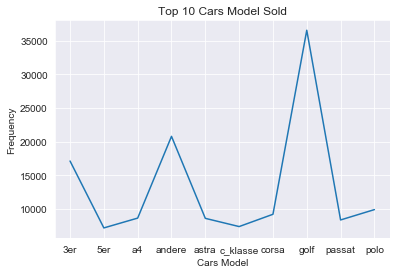

In [32]:
# Distribution of Top 10 car's moel sold
sns.lineplot(df_auto.model.value_counts()[:10].index, df_auto.model.value_counts()[:10].values)
plt.xticks(df_auto.model.value_counts()[:10].index)
plt.xlabel('Cars Model')
plt.ylabel('Frequency')
plt.title('Top 10 Cars Model Sold');

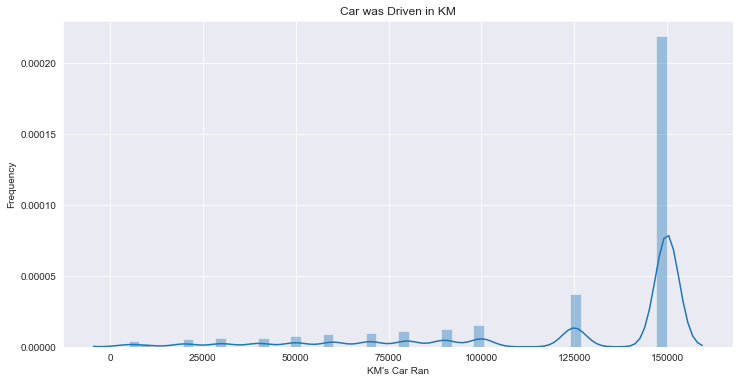

In [33]:
# Ditribution of Mesurement of KM a car ran before coming for sale
plt.figure(figsize=(12,6))
sns.distplot(df_auto.kilometer)
plt.xlabel("KM's Car Ran")
plt.ylabel('Frequency')
plt.title('Car was Driven in KM');

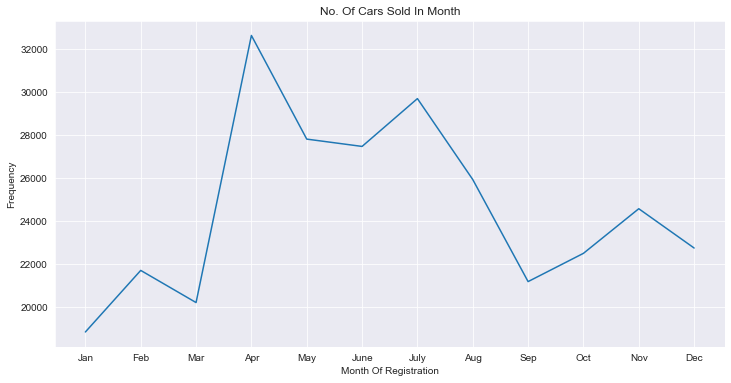

In [34]:
# No. of car registerd in a month for sale
plt.figure(figsize=(12,6))
sns.lineplot(df_auto.monthOfRegistration.value_counts().index, df_auto.monthOfRegistration.value_counts().values)
plt.xticks(df_auto.monthOfRegistration.value_counts().index.sort_values(), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("Month Of Registration")
plt.ylabel('Frequency')
plt.title('No. Of Cars Sold In Month');

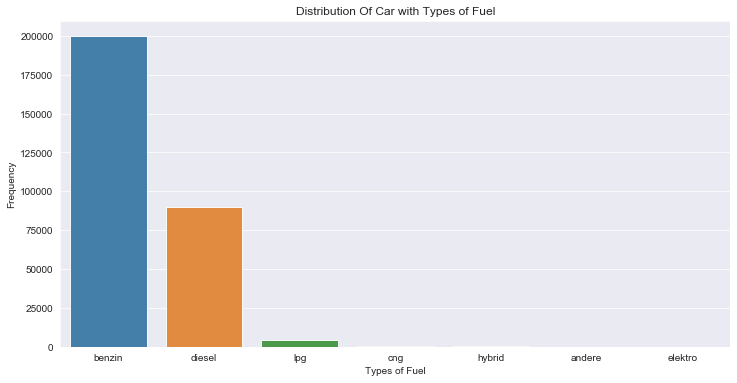

In [35]:
# Univariate Analysis of : fuel Type
plt.figure(figsize=(12,6))
sns.barplot(df_auto.fuelType.value_counts().index, df_auto.fuelType.value_counts().values, alpha=0.9)
plt.xlabel('Types of Fuel')
plt.ylabel('Frequency')
plt.title('Distribution Of Car with Types of Fuel');

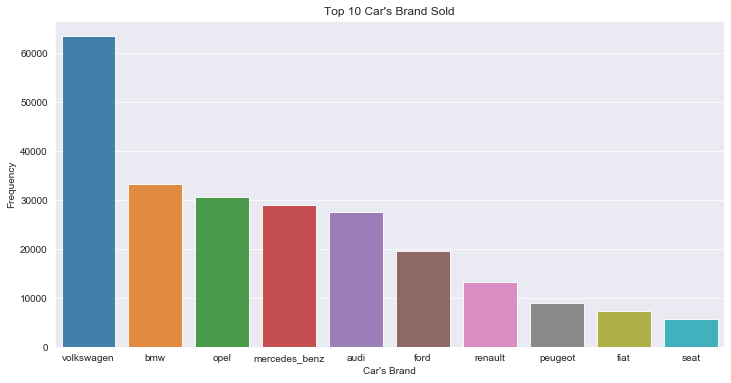

In [36]:
# Univariate Analysis of : Top 10 Car's Brand
plt.figure(figsize=(12,6))
sns.barplot(df_auto.brand.value_counts()[:10].index, df_auto.brand.value_counts()[:10].values, alpha=0.9)
plt.xlabel("Car's Brand")
plt.ylabel('Frequency')
plt.title("Top 10 Car's Brand Sold");

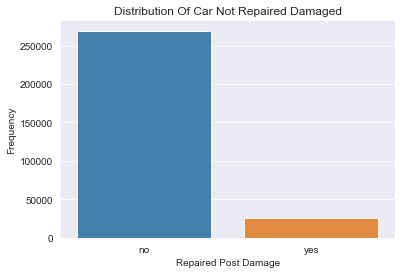

In [37]:
# Univariate Analysis of : Car was Repaired: yes/no before sale
sns.barplot(df_auto.notRepairedDamage.value_counts().index, df_auto.notRepairedDamage.value_counts().values, alpha=0.9)
plt.xlabel('Repaired Post Damage')
plt.ylabel('Frequency')
plt.title('Distribution Of Car Not Repaired Damaged');

In [38]:
# Investigating overall structure of feature : yearOfRegistration
df_auto.yearOfRegistration.describe()

count    295268.000000
mean       2003.931442
std          34.546892
min        1000.000000
25%        1999.000000
50%        2004.000000
75%        2008.000000
max        9999.000000
Name: yearOfRegistration, dtype: float64

In [39]:
# Observation which is older than 1989
df_auto[df_auto.yearOfRegistration < 1989]['yearOfRegistration'].count()

6227

In [40]:
# Observation which is more than 2019
df_auto[df_auto.yearOfRegistration > 2019]['yearOfRegistration'].count()

23

In [41]:
# Taking into considearion which is in the year of between 1989 & 2019
df_auto = df_auto[(df_auto.yearOfRegistration >= 1989) & (df_auto.yearOfRegistration <= 2019)]

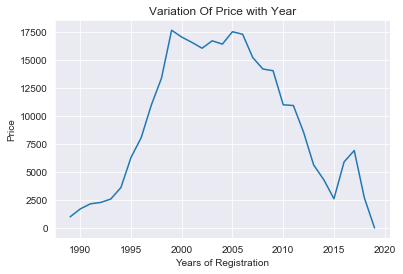

In [42]:
# No of car was registered for sale throughout the year
sns.lineplot(df_auto.groupby('yearOfRegistration')['price'].count().index,
            df_auto.groupby('yearOfRegistration')['price'].count().values,
            data=df_auto)
plt.xlabel('Years of Registration')
plt.ylabel('Price')
plt.title('Variation Of Price with Year');

In [43]:
# No of days it took to sold while purchasing from E-bay
days = []
for time1, time2 in zip(df_auto['dateCrawled'], df_auto['lastSeen']):
    time = datetime.strptime(time2, '%Y-%m-%d %H:%M:%S') - datetime.strptime(time1, '%Y-%m-%d %H:%M:%S')
    days.append(time.days)
        
df_auto['Sold_In_Days'] = days

In [44]:
# Investigating the feature : Sold_In_Days
df_auto.Sold_In_Days.describe()

count    289018.000000
mean          8.324153
std           8.299065
min         -13.000000
25%           2.000000
50%           5.000000
75%          13.000000
max          33.000000
Name: Sold_In_Days, dtype: float64

In [45]:
# Removing the observations having negative values as it doesn't make any sense
df_auto = df_auto[df_auto.Sold_In_Days >= 0]

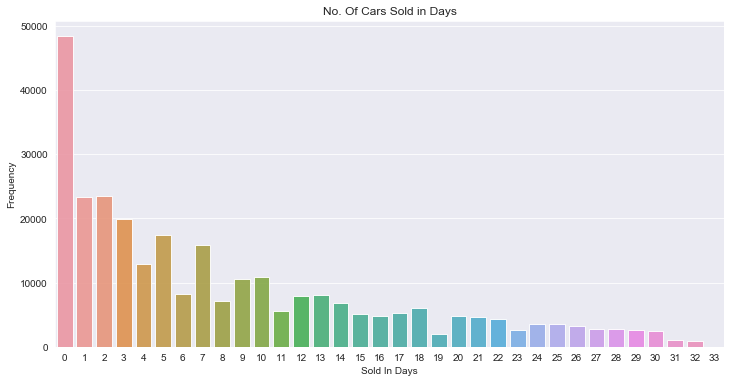

In [46]:
# Distribution of no. of cars sold in days
plt.figure(figsize=(12,6))
sns.barplot(df_auto.Sold_In_Days.value_counts().index, df_auto.Sold_In_Days.value_counts().values, alpha=0.9)
plt.xlabel('Sold In Days')
plt.ylabel('Frequency')
plt.title('No. Of Cars Sold in Days');

In [47]:
# Dropping the below mentioned features as they are unnecesary now while building models
# All the postal code is from Germany only
df_auto = df_auto.drop(['dateCrawled', 'lastSeen', 'dateCreated', 'nrOfPictures', 'model', 'abtest', 'postalCode'], axis=1)

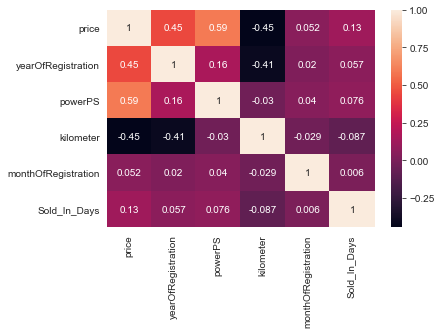

In [48]:
# Corelation matrix with Heatmap annotation
sns.heatmap(df_auto.corr(), annot=True);

In [49]:
# Function to get the Chi Square value & P value
def chi_p_value(cat1, cat2):
    table = pd.crosstab(df_auto[cat1], df_auto[cat2])
    chi2, p, dof, expected = chi2_contingency(table.values)
    if p < 0.05:
        print("Chi Square Statistics and p value of {} and {} is {}, {}".format(cat1, cat2, chi2, p))

In [50]:
# Extracting Chi Square value & p value
for i in range(len(df_auto.select_dtypes(include=['object']).columns)):
    for cat2 in df_auto.select_dtypes(include=['object']).columns[df_auto.select_dtypes(include=['object']).columns != 
                                                                  df_auto.select_dtypes(include=['object']).columns[i]]:
        chi_p_value(df_auto.select_dtypes(include=['object']).columns[i], cat2)

Chi Square Statistics and p value of vehicleType and gearbox is 15429.490694748882, 0.0
Chi Square Statistics and p value of vehicleType and fuelType is 54092.24564721556, 0.0
Chi Square Statistics and p value of vehicleType and brand is 150668.28973506403, 0.0
Chi Square Statistics and p value of vehicleType and notRepairedDamage is 692.4791595689611, 2.8844611207564856e-145
Chi Square Statistics and p value of gearbox and vehicleType is 15429.49069474888, 0.0
Chi Square Statistics and p value of gearbox and fuelType is 9470.141666243762, 0.0
Chi Square Statistics and p value of gearbox and brand is 51074.25437664582, 0.0
Chi Square Statistics and p value of gearbox and notRepairedDamage is 190.46020443187092, 2.522777684235797e-43
Chi Square Statistics and p value of fuelType and vehicleType is 54092.24564721556, 0.0
Chi Square Statistics and p value of fuelType and gearbox is 9470.14166624376, 0.0
Chi Square Statistics and p value of fuelType and brand is 33822.74781493969, 0.0
Chi 

In [51]:
# Taking into consideration of Sold_In_Dyas which is <= 5 days for bi-variate analysis
# It will give us the top most sold cars in first consecutive 5 days
df_auto_sold = df_auto[df_auto.Sold_In_Days < 5]

In [52]:
# Function to visualize bivariate analysis
def bivariate_analysis(param, xlabel):
    df_auto_sold.groupby([param, 'Sold_In_Days'])['price'].count().unstack().plot(kind='bar')
    plt.xticks(rotation=360)
    plt.xlabel(xlabel)
    plt.ylabel('Price')
    plt.title('Price Distribution of ' + xlabel + ' Sold within 0-4 days');

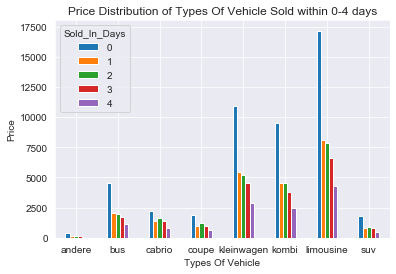

In [53]:
bivariate_analysis('vehicleType', 'Types Of Vehicle')

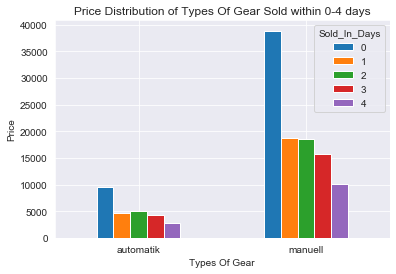

In [54]:
bivariate_analysis('gearbox', 'Types Of Gear')

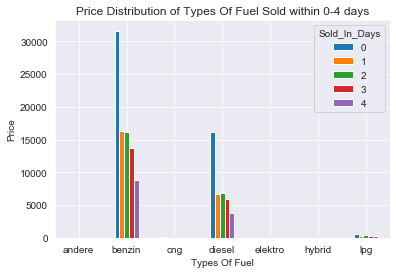

In [55]:
bivariate_analysis('fuelType', 'Types Of Fuel')

In [56]:
print("No. Of cars sold on the day the ad was published : ", df_auto[df_auto.Sold_In_Days == 0].count()[0])
print("No. Of cars sold on the 1st day the ad was published : ", df_auto[df_auto.Sold_In_Days == 1].count()[0])
print("No. Of cars sold on the 2nd day the ad was published : ", df_auto[df_auto.Sold_In_Days == 2].count()[0])

No. Of cars sold on the day the ad was published :  48415
No. Of cars sold on the 1st day the ad was published :  23370
No. Of cars sold on the 2nd day the ad was published :  23466


In [57]:
df_auto.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,Sold_In_Days
1,18300,coupe,2011,manuell,190,125000,5,diesel,audi,yes,13
2,9800,suv,2004,automatik,163,125000,8,diesel,jeep,no,21
3,1500,kleinwagen,2001,manuell,75,150000,6,benzin,volkswagen,no,0
4,3600,kleinwagen,2008,manuell,69,90000,7,diesel,skoda,no,5
5,650,limousine,1995,manuell,102,150000,10,benzin,bmw,yes,2


In [58]:
# Investigating the count of individual Categorical Features
for col in df_auto.select_dtypes(include=['object']).columns:
    print(col, len(df_auto[col].unique()))

vehicleType 8
gearbox 2
fuelType 7
brand 40
notRepairedDamage 2


In [59]:
# Interactive Distribution of Horsepower with Price
# Visualization possible among year/month/days/gearbox/damage
def plot_year(year, month, days, gearbox, damage):
    
    data = df_auto[(df_auto.yearOfRegistration == year) & (df_auto.monthOfRegistration == month) & 
                   (df_auto.Sold_In_Days == days) & (df_auto.gearbox == gearbox) & 
                   (df_auto.notRepairedDamage == damage)]
    
    area = 2 * df_auto.powerPS
    
    data.plot.scatter('powerPS', 'price', s = area, linewidth = 1, edgecolor='k', figsize=(12,8), alpha=0.7)
    
    plt.xlabel('Horse Power')
    plt.ylabel('Price')
    title = 'Variation of Price with Horse Power in ' +  str(year)
    plt.title(title)

In [60]:
interact(plot_year, year=widgets.IntSlider(min=1989, max=2019, step=1, value=2003, description='Year '), 
         month=widgets.IntSlider(min=1, max=12, step=1, value=2, description='Month '),
        days=widgets.IntSlider(min=0, max=10, step=1, value=0, description='Day '),
        gearbox = widgets.RadioButtons(value='manuell', options=list(df_auto.gearbox.unique()), description="Gear Type "),
        damage = widgets.RadioButtons(value='no', options=list(df_auto.notRepairedDamage.unique()), description="Repaired "))

interactive(children=(IntSlider(value=2003, description='Year ', max=2019, min=1989), IntSlider(value=2, descr…

<function __main__.plot_year(year, month, days, gearbox, damage)>

In [61]:
df_auto.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,Sold_In_Days
1,18300,coupe,2011,manuell,190,125000,5,diesel,audi,yes,13
2,9800,suv,2004,automatik,163,125000,8,diesel,jeep,no,21
3,1500,kleinwagen,2001,manuell,75,150000,6,benzin,volkswagen,no,0
4,3600,kleinwagen,2008,manuell,69,90000,7,diesel,skoda,no,5
5,650,limousine,1995,manuell,102,150000,10,benzin,bmw,yes,2


In [62]:
# Importing Necessary Libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [63]:
X = df_auto.drop(['price'], axis=1)
y = df_auto.price

X['yearOfRegistration'] = X['yearOfRegistration'].apply(lambda x: str(x))
X['monthOfRegistration'] = X['monthOfRegistration'].apply(lambda x: str(x))

X = pd.get_dummies(data=X,
                   columns= ['vehicleType','yearOfRegistration','gearbox','monthOfRegistration','fuelType','brand','notRepairedDamage'],
                   drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(max_depth = 10, max_leaf_nodes = 100, n_estimators=5)

rf.fit(X_train, y_train)
print('Accuracy of the Model: ', rf.score(X_test, y_test) * 100)

Accuracy of the Model:  74.08237676969773


In [64]:
# def model_accuracy_test(depth, leaf, n):
#     rf = RandomForestRegressor(max_depth = depth, max_leaf_nodes = leaf, n_estimators=n)
#     rf.fit(X_train, y_train)
#     return rf.score(X_test, y_test)

# depths = [1, 2, 5, 10, 50, 100, 500]
# leaves = [2, 5, 10, 20, 30, 50, 100]
# for depth in depths:
#     for leaf in leaves:
#         print('Accuracy Score of The Model for Max {} of leaves {} is : '.format(depth, leaf), model_accuracy_test(depth, leaf))

# for n in range(1,11):
#     print('Score of {}'.format(n), model_accuracy_test(10, 100, n))

# print('Accuracy of the Model Using Random Forest: ', model_accuracy_test(10, 100, 5) * 100)